In [24]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [28]:
# Generate synthetic loan data (original rule)
np.random.seed(42)
n_samples = 1000
data = {
    'credit_score': np.random.randint(300, 850, n_samples),
    'annual_revenue': np.random.uniform(10000, 10000000, n_samples),
    'loan_amount': np.random.uniform(5000, 500000, n_samples),
    'debt_to_income': np.random.uniform(0.1, 0.8, n_samples),
    'years_in_business': np.random.randint(1, 20, n_samples),
    'industry_risk': np.random.uniform(0, 1, n_samples),
    'previous_loans': np.random.randint(0, 5, n_samples),
}
data['approved'] = (
    (data['credit_score'] > 550) & 
    (data['annual_revenue'] > 40000) & 
    (data['loan_amount'] < data['annual_revenue'] * 0.6) &
    (data['years_in_business'] > 2) & 
    (data['industry_risk'] < 0.7)
).astype(int)
df = pd.DataFrame(data)
print(df.head())  # Check the first few rows

# Check data balance
print("Approval distribution:\n", df['approved'].value_counts(normalize=True))

   credit_score  annual_revenue    loan_amount  debt_to_income  \
0           402    9.001186e+06   77989.000720        0.456223   
1           735    8.740162e+06  167455.413037        0.358497   
2           570    5.978157e+06  219839.586256        0.753047   
3           406    6.009163e+06   48857.212691        0.679254   
4           371    6.653716e+06  114202.916592        0.588047   

   years_in_business  industry_risk  previous_loans  approved  
0                 16       0.476526               2         0  
1                  2       0.737880               3         0  
2                 10       0.139002               0         1  
3                  3       0.440071               2         0  
4                 11       0.482851               4         0  
Approval distribution:
 approved
0    0.678
1    0.322
Name: proportion, dtype: float64


In [29]:
# Prepare data
X = df[['credit_score', 'annual_revenue', 'loan_amount', 'debt_to_income', 
        'years_in_business', 'industry_risk', 'previous_loans']]
y = df['approved']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a simpler model
model = keras.Sequential([
    keras.layers.Input(shape=(7,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),  # Lighter dropout
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping with more patience
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True  # Back to val_loss, more patience
)

# Train
history = model.fit(X_train, y_train, epochs=200, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6922 - loss: 0.6584 - val_accuracy: 0.6187 - val_loss: 0.6761
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6899 - loss: 0.6402 - val_accuracy: 0.6187 - val_loss: 0.6598
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6906 - loss: 0.6050 - val_accuracy: 0.6187 - val_loss: 0.6347
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6897 - loss: 0.5844 - val_accuracy: 0.6187 - val_loss: 0.6042
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 0.5365 - val_accuracy: 0.6313 - val_loss: 0.5746
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 0.4910 - val_accuracy: 0.7250 - val_loss: 0.5242
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7839 - loss: 0.4587 - val_accuracy: 0.7312 - val_loss: 0.4916
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.4351 - val_accuracy: 0.7812 - v

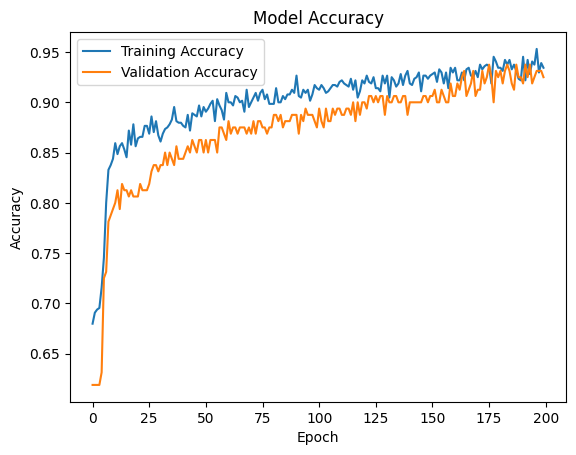

<Figure size 640x480 with 0 Axes>

In [36]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the plot as a file
plt.savefig('accuracy_plot.png')

In [31]:
# Updated predict function
def predict_loan_approval(model, scaler):
    print("Enter the following details for a loan application:")
    credit_score = float(input("Credit Score (300-850): "))
    annual_revenue = float(input("Annual Revenue ($10k-$10M): "))
    loan_amount = float(input("Loan Amount ($5k-$500k): "))
    debt_to_income = float(input("Debt-to-Income Ratio (0.1-0.8): "))
    years_in_business = float(input("Years in Business (1-20): "))
    industry_risk = float(input("Industry Risk (0-1, 0=low, 1=high): "))
    previous_loans = float(input("Previous Loans (0-4): "))

    # Create DataFrame with same column names as training data
    user_input = pd.DataFrame([[credit_score, annual_revenue, loan_amount, debt_to_income, 
                                years_in_business, industry_risk, previous_loans]],
                              columns=['credit_score', 'annual_revenue', 'loan_amount', 
                                       'debt_to_income', 'years_in_business', 'industry_risk', 
                                       'previous_loans'])
    
    # Scale the input
    user_input_scaled = scaler.transform(user_input)
    
    # Predict
    prediction = model.predict(user_input_scaled, verbose=0)  # Silent prediction
    approval_prob = prediction[0][0]
    result = "Approved" if approval_prob > 0.5 else "Rejected"
    print(f"Approval Probability: {approval_prob:.2%}")
    print(f"Loan Decision: {result}")

# Test it
predict_loan_approval(model, scaler)

Enter the following details for a loan application:


Credit Score (300-850):  850
Annual Revenue ($10k-$10M):  10000000
Loan Amount ($5k-$500k):  50000
Debt-to-Income Ratio (0.1-0.8):  .2
Years in Business (1-20):  20
Industry Risk (0-1, 0=low, 1=high):  .2
Previous Loans (0-4):  1


Approval Probability: 99.96%
Loan Decision: Approved


In [33]:
# Hardcoded test case
user_input = pd.DataFrame([[650, 100000, 50000, 0.3, 5, 0.2, 1]],
                          columns=['credit_score', 'annual_revenue', 'loan_amount', 
                                   'debt_to_income', 'years_in_business', 'industry_risk', 
                                   'previous_loans'])
user_input_scaled = scaler.transform(user_input)
prediction = model.predict(user_input_scaled, verbose=0)
approval_prob = prediction[0][0]
result = "Approved" if approval_prob > 0.5 else "Rejected"
print(f"Approval Probability: {approval_prob:.2%}")
print(f"Loan Decision: {result}")

Approval Probability: 58.98%
Loan Decision: Approved


In [35]:
import pickle
model.save('loan_model.keras')  # Saves as native Keras format
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)  # Save the scaler